### Import necessary package 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import sklearn.model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Data understanding and EDA

In [ ]:
data=pd.read_csv(r'/content/bankruptcy_prevention.csv')
data.head(5)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [ ]:
data.shape

(250, 7)

#### There are 7 columns in data. 
#### Class is the response variable which has two classes bankruptcy and non-bankruptcy.
#### This data is for 250 companies.


### EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [ ]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.isna().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

#### There are no missing values in data

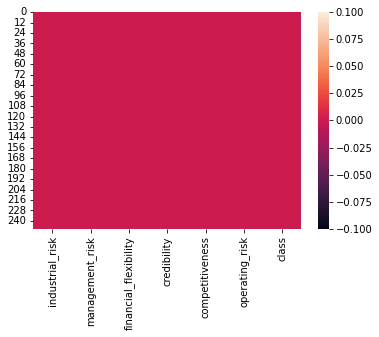

In [ ]:
sns.heatmap(data.isna())

#### From heatmap also we can see there is no missing data

### Data Visualisation

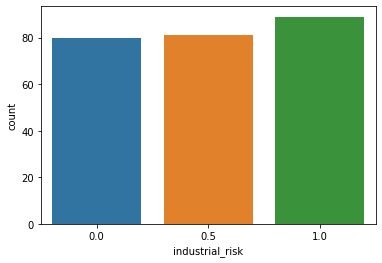

In [ ]:
# Barplot for industrial risk
sns.countplot(data['industrial_risk'])

In [ ]:
ind_risk_count=data['industrial_risk'].value_counts()
ind_risk_count

1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64

In [ ]:
# This function is to get percentage format for pie-chart.
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

In [ ]:
# calling function for percentage
ind_risk_per=make_autopct(list(ind_risk_count.values))
ind_risk_per

<function __main__.make_autopct.<locals>.my_autopct(pct)>

([<matplotlib.patches.Wedge at 0x7f26efd81c40>,
 [Text(0.480827324049145, 0.9893457860868153, 'High_Risk'),
  Text(-1.0929724363648976, -0.12414206920532618, 'Medium_Risk'),
  Text(0.5894094953465407, -0.9287607048079373, 'Low_Risk')],
 [Text(0.26226944948135184, 0.5396431560473538, '35.60%  (89)'),
  Text(-0.5961667834717623, -0.06771385593017791, '32.40%  (81)'),
  Text(0.32149608837084037, -0.5065967480770566, '32.00%  (80)')])

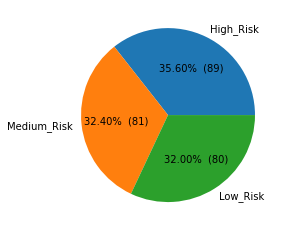

In [ ]:
# Pie-chart for industrial risk
labels_list = ['High_Risk','Medium_Risk','Low_Risk']
plt.pie(ind_risk_count,labels=labels_list,autopct=ind_risk_per)

#### Data count for high industrial risk is more than Low industrial risk and medium industrial risk.
#### Data count for high industrial risk is 89 .
#### Data count for medium industrial risk is 81.
#### Data count for low indutrial risk is 80.

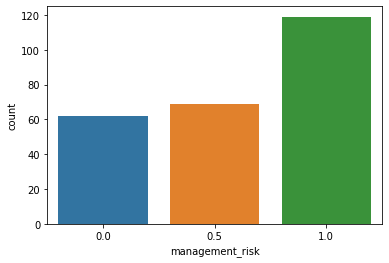

In [ ]:
# Barplot for  management risk
sns.countplot(data["management_risk"])

In [ ]:
man_risk_count=data['management_risk'].value_counts()
man_risk_count

1.0    119
0.5     69
0.0     62
Name: management_risk, dtype: int64

In [ ]:
man_risk_per=make_autopct(list(man_risk_count.values))
man_risk_per

<function __main__.make_autopct.<locals>.my_autopct(pct)>

([<matplotlib.patches.Wedge at 0x7f26efca2f10>,
 [Text(0.08285944828829286, 1.096874793141569, 'High_Risk'),
  Text(-0.8296764847285306, -0.7222443704789318, 'Medium_Risk'),
  Text(0.7826892547719247, -0.7729149568125651, 'Low_Risk')],
 [Text(0.045196062702705195, 0.598295341713583, '47.60%  (119)'),
  Text(-0.45255080985192575, -0.39395147480669, '27.60%  (69)'),
  Text(0.42692141169377706, -0.4215899764432173, '24.80%  (62)')])

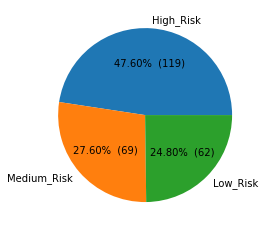

In [ ]:
# Pie-chart for management risk
labels_list = ['High_Risk','Medium_Risk','Low_Risk']
plt.pie(man_risk_count,labels=labels_list,autopct=man_risk_per)

#### Data count for high management risk is more than Low management risk and medium management risk.
#### Data count for high management risk is 119 .
#### Data count for medium management risk is 69.
#### Data count for low management risk is 62.

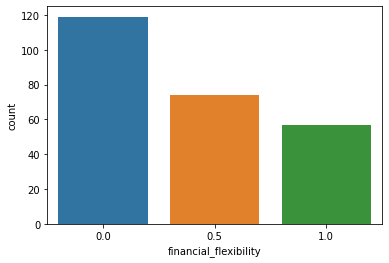

In [ ]:
# barplot for financial flexibility
sns.countplot(data['financial_flexibility'])

In [ ]:
fin_count=data['financial_flexibility'].value_counts()
fin_count

0.0    119
0.5     74
1.0     57
Name: financial_flexibility, dtype: int64

In [ ]:
fin_flex_per=make_autopct(list(fin_count.values))
fin_flex_per

<function __main__.make_autopct.<locals>.my_autopct(pct)>

([<matplotlib.patches.Wedge at 0x7f26efbcc100>,
 [Text(0.08285944828829286, 1.096874793141569, 'Low_flexibility'),
  Text(-0.7826891824064006, -0.7729150300932182, 'Medium_flexibility'),
  Text(0.8296765861606191, -0.7222442539590475, 'High_flexibility')],
 [Text(0.045196062702705195, 0.598295341713583, '47.60%  (119)'),
  Text(-0.42692137222167303, -0.42159001641448257, '29.60%  (74)'),
  Text(0.45255086517851945, -0.39395141125038946, '22.80%  (57)')])

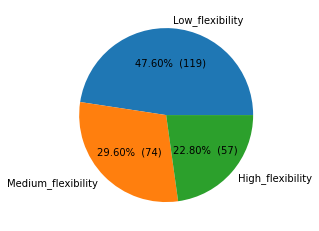

In [ ]:
# Pie-chart for financial flexibility
labels_list = ['Low_flexibility','Medium_flexibility','High_flexibility']
plt.pie(fin_count,labels=labels_list,autopct=fin_flex_per)

#### Data count for low financial flexibilty is more than High financial flexibilty and medium financial flexibilty.
#### Data count for low financial flexibilty is 119 .
#### Data count for medium financial flexibilty is 74.
#### Data count for high financial flexibilty is 57.

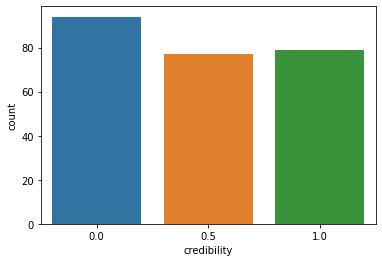

In [ ]:
# barplot for credibility
sns.countplot(data['credibility'])

In [ ]:
cred_count=data['credibility'].value_counts()
cred_count

0.0    94
1.0    79
0.5    77
Name: credibility, dtype: int64

In [ ]:
cred_per=make_autopct(list(cred_count.values))
cred_per

<function __main__.make_autopct.<locals>.my_autopct(pct)>

([<matplotlib.patches.Wedge at 0x7f26efb6e4c0>,
 [Text(0.41775704623199333, 1.0175849106209862, 'Low_credibility'),
  Text(-1.0749949441347812, -0.23320778307050272, 'High_credibility'),
  Text(0.6239958487890805, -0.9058858541195989, 'Medium_credibility')],
 [Text(0.22786747976290542, 0.5550463148841742, '37.60%  (94)'),
  Text(-0.5863608786189716, -0.1272042453111833, '31.60%  (79)'),
  Text(0.34036137206677114, -0.4941195567925084, '30.80%  (77)')])

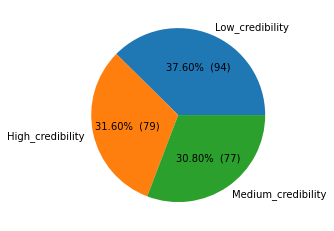

In [ ]:
# Pie-chart for credibility
labels_list = ['Low_credibility','High_credibility','Medium_credibility']
plt.pie(cred_count,labels=labels_list,autopct=cred_per)

#### Data count for low credibility is more than High credibility and medium credibility.
#### Data count for low credibility is 94 .
#### Data count for medium credibility is 79.
#### Data count for high credibility is 77.

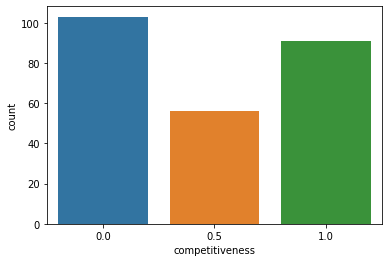

In [ ]:
# barplot for competitiveness
sns.countplot(data['competitiveness'])

In [ ]:
comp_count=data['competitiveness'].value_counts()
comp_count

0.0    103
1.0     91
0.5     56
Name: competitiveness, dtype: int64

In [ ]:
comp_per=make_autopct(list(comp_count.values))
comp_per

<function __main__.make_autopct.<locals>.my_autopct(pct)>

([<matplotlib.patches.Wedge at 0x7f26efa8c040>,
 [Text(0.30024712748379895, 1.0582304391944732, 'Low_competitiveness'),
  Text(-0.9136555015034916, -0.6125631596598047, 'High_competitiveness'),
  Text(0.8386867466521295, -0.7117615759438458, 'Medium_competitiveness')],
 [Text(0.1637711604457085, 0.5772166031969853, '41.20%  (103)'),
  Text(-0.49835754627463175, -0.3341253598144389, '36.40%  (91)'),
  Text(0.4574654981738887, -0.3882335868784613, '22.40%  (56)')])

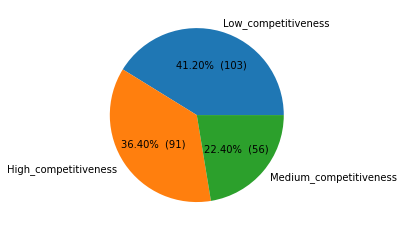

In [ ]:
# Pie-chart for competitiveness
labels_list = ['Low_competitiveness','High_competitiveness','Medium_competitiveness']
plt.pie(comp_count,labels=labels_list,autopct=comp_per)

#### Data count for low competitiveness is more than High competitiveness and medium competitiveness.
#### Data count for low competitiveness is 103 .
#### Data count for medium competitiveness is 56.
#### Data count for high competitiveness is 91.

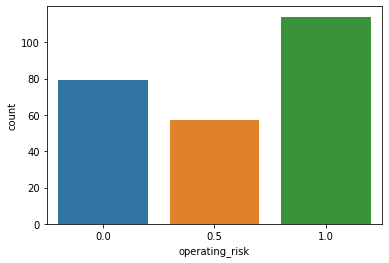

In [ ]:
# Barplot for operating_risk
sns.countplot(data['operating_risk'])

In [ ]:
oper_count=data['operating_risk'].value_counts()
oper_count

1.0    114
0.0     79
0.5     57
Name: operating_risk, dtype: int64

In [ ]:
oper_per=make_autopct(list(oper_count.values))
oper_per

<function __main__.make_autopct.<locals>.my_autopct(pct)>

([<matplotlib.patches.Wedge at 0x7f26efa1caf0>,
 [Text(0.15156931893704537, 1.0895075683798439, 'High_Risk'),
  Text(-0.8296764847285306, -0.7222443704789318, 'Low_Risk'),
  Text(0.8296765861606191, -0.7222442539590475, 'Medium_Risk')],
 [Text(0.08267417396566111, 0.5942768554799148, '45.60%  (114)'),
  Text(-0.45255080985192575, -0.39395147480669, '31.60%  (79)'),
  Text(0.45255086517851945, -0.39395141125038946, '22.80%  (57)')])

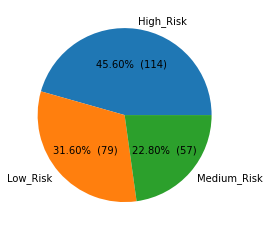

In [ ]:
# Pie-chart for operating_risk
labels_list = ['High_Risk','Low_Risk','Medium_Risk']
plt.pie(oper_count,labels=labels_list,autopct=oper_per)

#### Data count for high operating risk is more than low operating risk and medium operating risk .
#### Data count for high operating risk is 114 .
#### Data count for medium operating risk is 57.
#### Data count for low operating risk is 79.

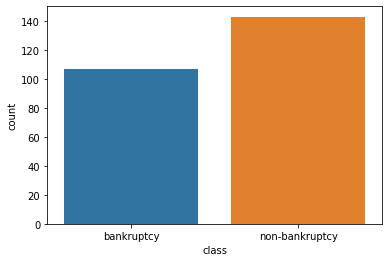

In [ ]:
sns.countplot(data['class'])

In [ ]:
class_count=data['class'].value_counts()
class_count

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64

In [ ]:
class_per=make_autopct(list(class_count.values))
class_per

<function __main__.make_autopct.<locals>.my_autopct(pct)>

([<matplotlib.patches.Wedge at 0x7f26ef9bc910>,
 [Text(-0.24669792697222737, 1.0719795393698546, 'non-bankruptcy'),
  Text(0.24669802733819424, -1.0719795162723231, 'bankruptcy')],
 [Text(-0.1345625056212149, 0.584716112383557, '57.20%  (143)'),
  Text(0.13456256036628775, -0.5847160997849035, '42.80%  (107)')])

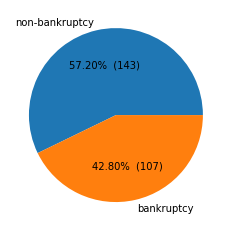

In [ ]:
# Pie-chart for class
labels_list = ['non-bankruptcy','bankruptcy']
plt.pie(class_count,labels=labels_list,autopct=class_per)

#### Data count for non-bankruptcy is more than bankruptcy .
#### Data count for non-bankruptcy is 143 .
#### Data count for bankruptcy is 107

### industrial risk vs bankruptcy status

class            bankruptcy  non-bankruptcy
industrial_risk                            
0.0                      26              54
0.5                      28              53
1.0                      53              36


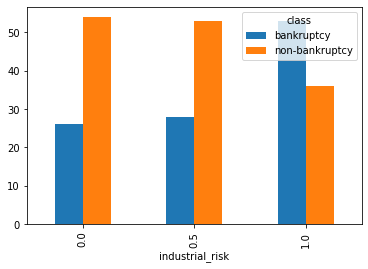

In [ ]:
df1 = pd.crosstab(data['industrial_risk'], data['class'])
print(df1)
df1.plot.bar()

#### Non bankruptcy count is high for low and medium industrial risk and bankruptcy count is high for high industrial risk.

### management_risk vs bankruptcy status

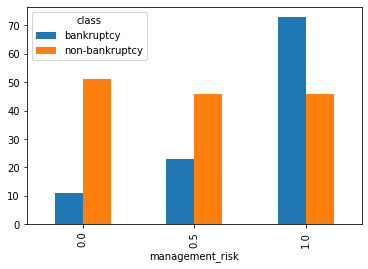

In [ ]:
df2 = pd.crosstab(data['management_risk'], data['class'])
df2.plot.bar()

#### Non bankruptcy count is high for low and medium management risk and bankruptcy count is high for high management risk.

### financial_flexibility vs bankruptcy status

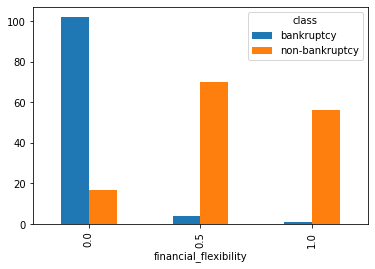

In [ ]:


df3 = pd.crosstab(data['financial_flexibility'], data['class'])
df3.plot.bar()

#### Bankruptcy count is high for low  financial_flexibility and non bankruptcy count is high for low and high financial_flexibility.

### credibility vs bankruptcy status

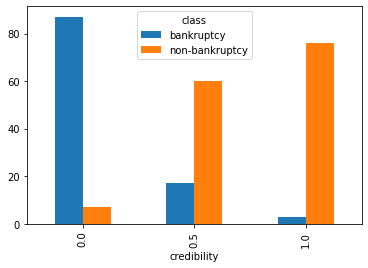

In [ ]:
df4 = pd.crosstab(data['credibility'], data['class'])
df4.plot.bar()

#### Bankruptcy count is high for low credibility and non bankruptcy count is high for low and high credibility.

### competitiveness vs bankruptcy status

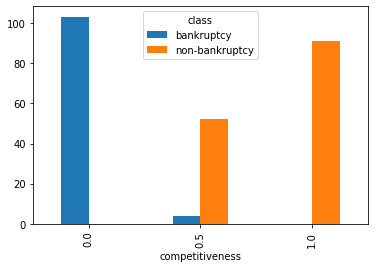

In [ ]:
df5 = pd.crosstab(data['competitiveness'], data['class'])
df5.plot.bar()

#### Bankruptcy count is high for low competitiveness and non bankruptcy count is high for low and high competitiveness.
#### There is no Non bankruptcy with low competitiveness and no bankruptcy with high competitiveness.

### operating_risk vs bankruptcy status

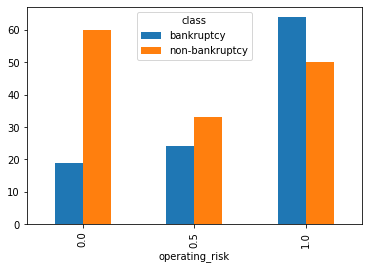

In [ ]:
df6 = pd.crosstab(data['operating_risk'], data['class'])
df6.plot.bar()

#### Bankruptcy count is high for high operating_risk and non bankruptcy count is high for low and medium operating_risk.

#### Label Encoding

In [ ]:
le=LabelEncoder()

#### bankruptcy=0, non_bankruptcy=1

In [ ]:
data['class']=le.fit_transform(data['class'])
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [ ]:

data['class'].value_counts()

1    143
0    107
Name: class, dtype: int64

### Correletion

In [ ]:
data.corr(method='spearman')

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.272203,-0.164998,-0.016345,-0.260273,0.141632,-0.229472
management_risk,0.272203,1.000000,-0.270605,-0.299652,-0.317585,0.206093,-0.374391
financial_flexibility,-0.164998,-0.270605,1.000000,0.556134,0.712831,-0.124921,0.782953
credibility,-0.016345,-0.299652,0.556134,1.000000,0.684899,-0.289193,0.761855
competitiveness,-0.260273,-0.317585,0.712831,0.684899,1.000000,-0.218160,0.905999
operating_risk,0.141632,0.206093,-0.124921,-0.289193,-0.218160,1.000000,-0.278443
class,-0.229472,-0.374391,0.782953,0.761855,0.905999,-0.278443,1.000000


#### There are class and competitiveness are highly correleted variables in the data
#### Competitiveness variable is important for prediction of class variable

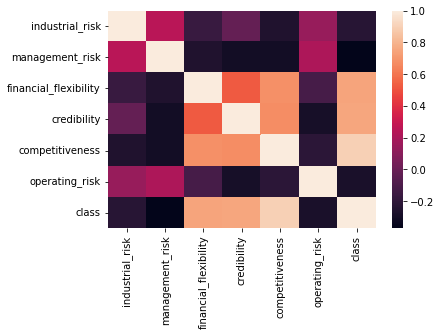

In [ ]:
sns.heatmap(data.corr())

In [ ]:
x=data.iloc[:,:-1]
x

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [ ]:
y=data.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: class, Length: 250, dtype: int64

## Model Building

#### Train - Test split

In [ ]:
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=.20)

#### Logistic Regression

In [ ]:
clf=LogisticRegression(C=1.0,tol=0.001)

In [ ]:
clf.fit(x_train,y_train)

LogisticRegression(tol=0.001)

In [ ]:
# Prediction on test data
pred_log_test=clf.predict(x_test)
pred_log_test

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1])

In [ ]:
# Prediction on train data
pred_log_train=clf.predict(x_train)
pred_log_train

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1])

#### Accuracy, Precision, Recall and f1-score of Logistic Regression model on test data

In [ ]:
test_acc_logistic = accuracy_score(y_test,pred_log_test)
test_recall_logistic = recall_score(y_test,pred_log_test)
test_precis_logistic = precision_score(y_test,pred_log_test)
test_f1_logistic = f1_score(y_test,pred_log_test)
print('accuracy_score',test_acc_logistic)
print('recall_score',test_recall_logistic)
print('precision_score',test_precis_logistic)
print('f1_score',test_f1_logistic)

accuracy_score 1.0
recall_score 1.0
precision_score 1.0
f1_score 1.0


#### Accuracy,Precision,Recall of Logistic Regression model on train data

In [ ]:

tain_acc_logistic = accuracy_score(y_train,pred_log_train)
train_recall_logi = recall_score(y_train,pred_log_train)
train_precision_logi = precision_score(y_train,pred_log_train)
train_f1_logi = f1_score(y_train,pred_log_train)
print('accuracy_score',tain_acc_logistic)
print('recall_score',train_recall_logi)
print('precision_score',train_precision_logi)
print('f1_score',train_f1_logi)

accuracy_score 0.995
recall_score 1.0
precision_score 0.9913793103448276
f1_score 0.9956709956709957


#### Here performance metrics for train and test data are almost same. There is no overfitting model

#### Classification report of logistic regression model on test data

In [ ]:
print(classification_report(y_test,pred_log_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### Classification report of logistic regression model on train data

In [ ]:
print(classification_report(y_train,pred_log_train))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        85
           1       0.99      1.00      1.00       115

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



### Hyperparameter tunning for logistic regression

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
model_log = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_log, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.996000 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.993333 (0.014907) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.993333 (0.014907) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.993333 (0.014907) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.996000 (0.012000) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.996000 (0.012000) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.996000 (0.012000) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.996000 (0.012000) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.996000 (0.012000) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.996000 (0.012000) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.996000 (0.012000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.996000 (0.012000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.996000 (0.012000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.938667 (0.054390) with

#### After hyperparameter tuning best parameters for logistic regression are:
#### {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
#### We'll fit best model with this parameters

In [ ]:
best_logistic =LogisticRegression(C=10,penalty='l2',solver='newton-cg')

In [ ]:
best_logistic.fit(x_train,y_train)

LogisticRegression(C=10, solver='newton-cg')

In [ ]:
pred_log_test_hyper=best_logistic.predict(x_test)
pred_log_test_hyper

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1])

#### Accuracy, Precision, Recall and f1-score of best parameter Logistic Regression model on test data

In [ ]:
hyper_test_acc_logi = accuracy_score(y_test,pred_log_test_hyper)
hyper_test_recall_logi = recall_score(y_test,pred_log_test_hyper)
hyper_test_precision_logi = precision_score(y_test,pred_log_test_hyper)
hyper_test_f1_logi=f1_score(y_test,pred_log_test_hyper)
print('accuracy_score',hyper_test_acc_logi)
print('recall_score',hyper_test_recall_logi)
print('precision_score',hyper_test_acc_logi)
print('f1_score',hyper_test_f1_logi)

accuracy_score 1.0
recall_score 1.0
precision_score 1.0
f1_score 1.0


#### Classification report of best parameter logistic regression model on test data

In [ ]:
print(classification_report(y_test,pred_log_test_hyper))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### AUC_ROC curve for logistic regression

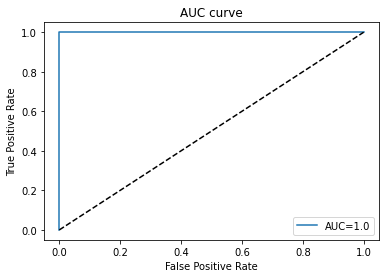

In [ ]:

roc_log = best_logistic.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_log)
auc = metrics.roc_auc_score(y_test, roc_log)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('AUC curve')
plt.legend(loc=4)
plt.show()

#### AUC is 1 hence logistic model is good for prediction.

### Decision Tree

In [ ]:
model_dec=DecisionTreeClassifier(criterion='entropy')
model_dec.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

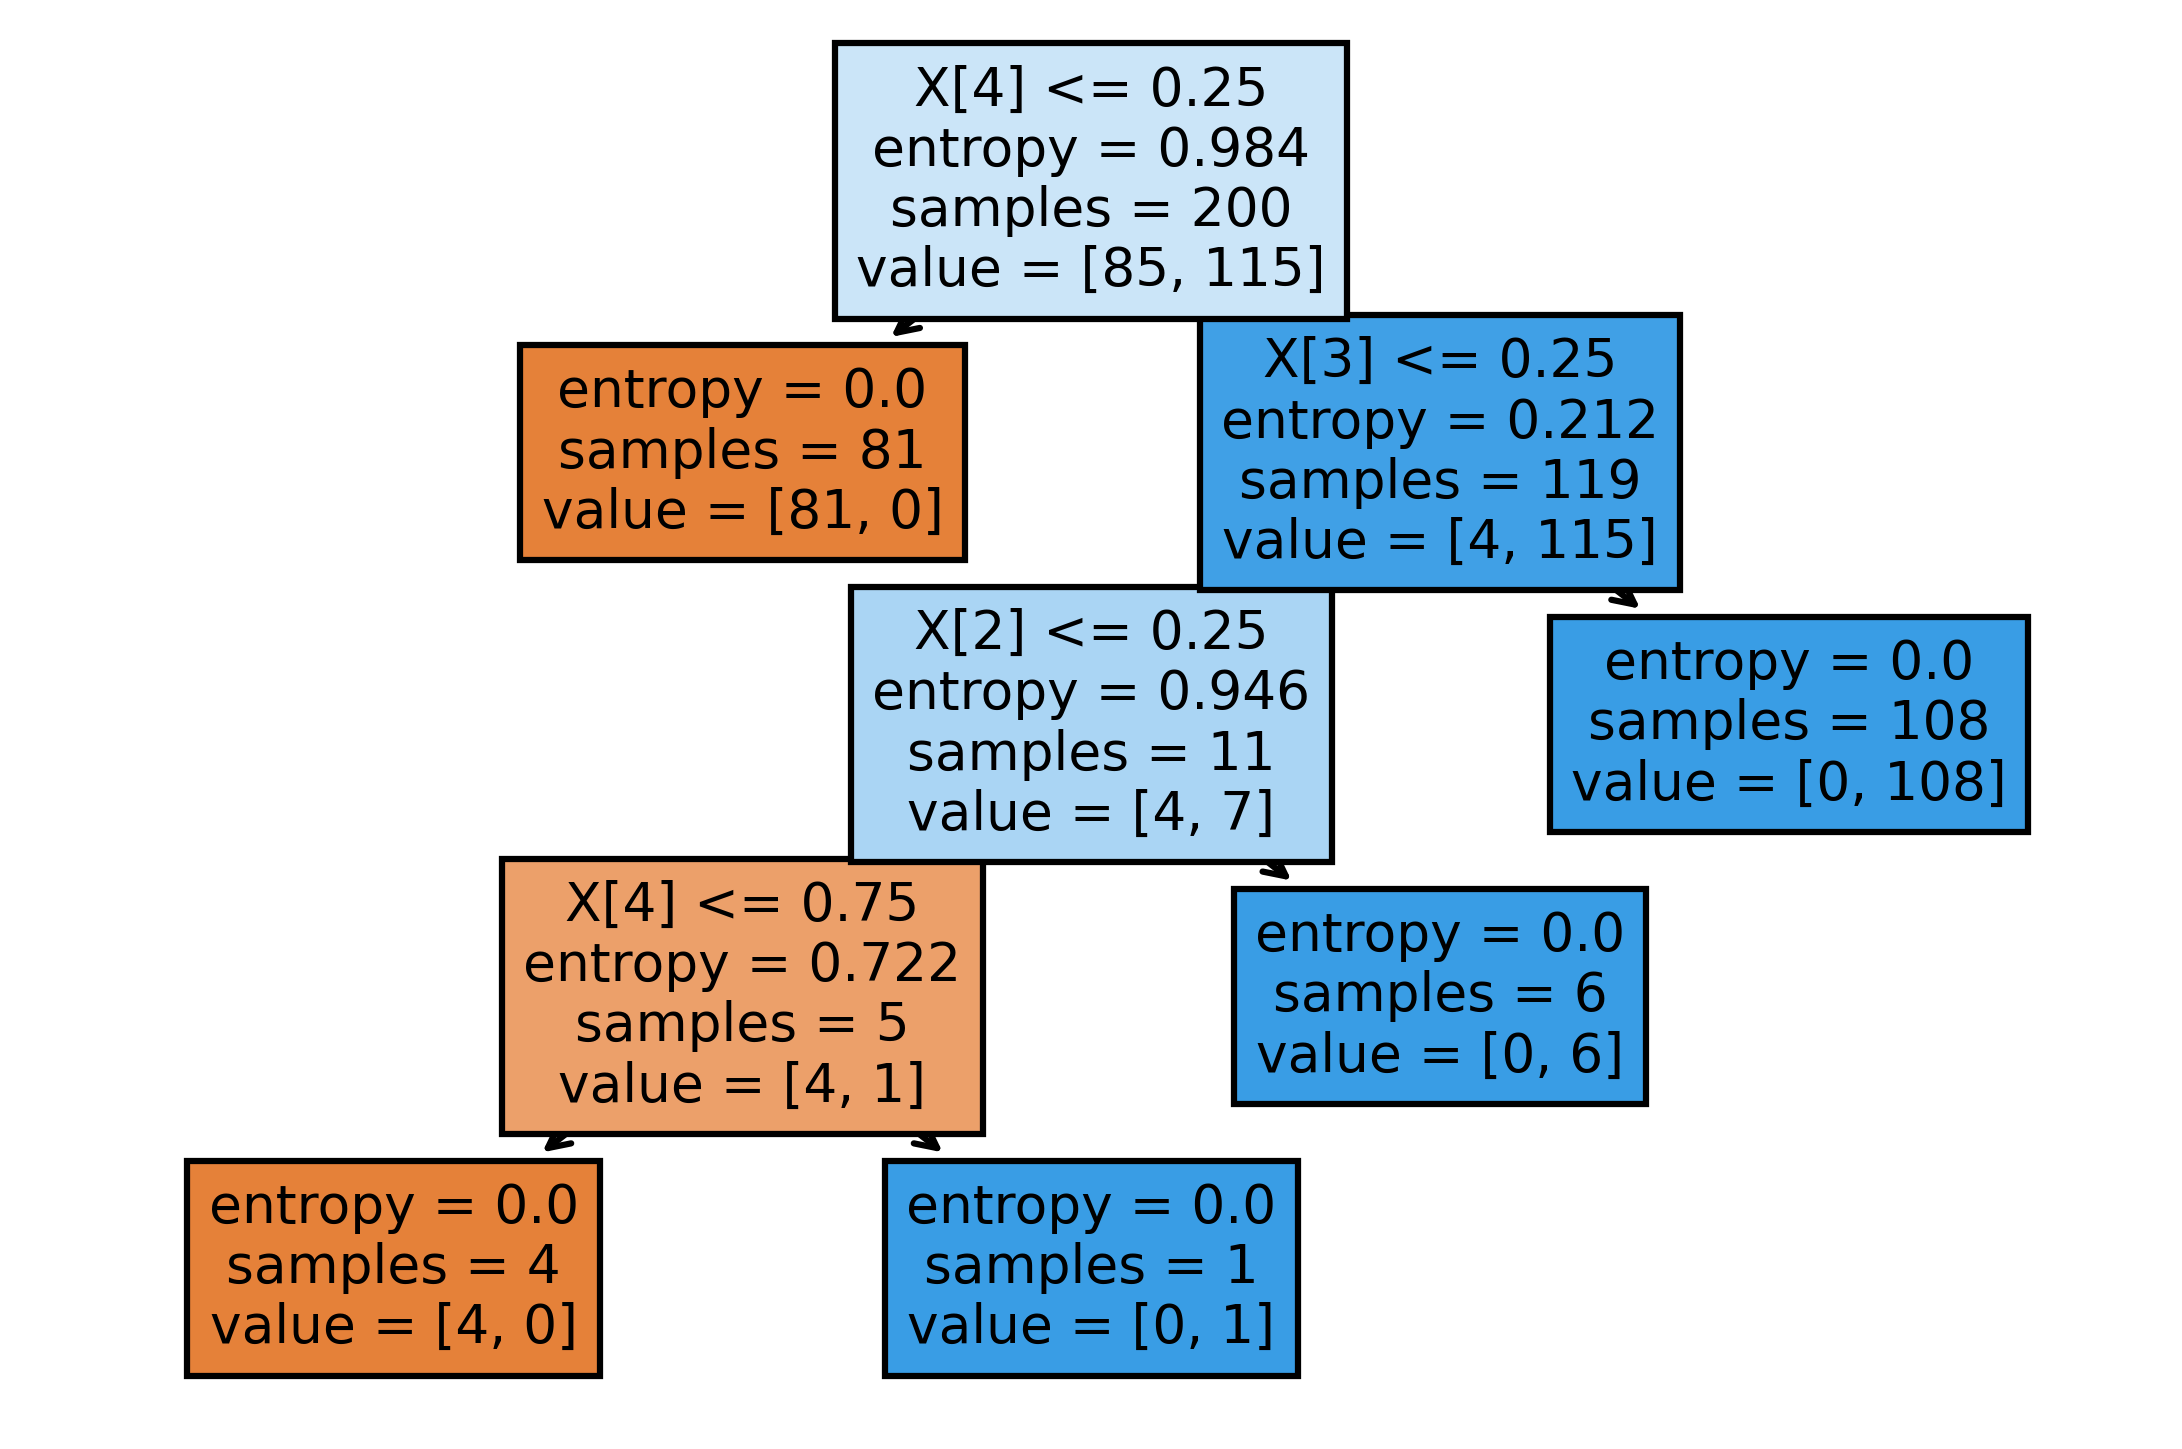

In [ ]:

#PLot the decision tree
plt.figure(dpi=450)
tree.plot_tree(model_dec,filled=True);

In [ ]:
preds_dec_test = model_dec.predict(x_test)
preds_dec_test

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1])

In [ ]:
preds_dec_train = model_dec.predict(x_train)
preds_dec_train

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1])

#### Accuracy, Precision, Recall and f1-score of Decision Tree model on test data

In [ ]:
acc_dec_test = accuracy_score(y_test,preds_dec_test)
precision_dec_test = precision_score(y_test,preds_dec_test)
recall_dec_test = recall_score(y_test,preds_dec_test)
f1_dec_test = f1_score(y_test,preds_dec_test)
print('accuracy_score',acc_dec_test)
print('precision_score',precision_dec_test)
print('recall_score',recall_dec_test)
print('f1_score',f1_dec_test)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Accuracy, Precision, Recall and f1-score of Decision Tree model on train data

In [ ]:
acc_dec_train = accuracy_score(y_train,preds_dec_train)
precision_dec_train = precision_score(y_train,preds_dec_train)
recall_dec_train = recall_score(y_train,preds_dec_train)
f1_dec_train = f1_score(y_train,preds_dec_train)
print('accuracy_score',acc_dec_train)
print('precision_score',precision_dec_train)
print('recall_score',recall_dec_train)
print('f1_score',f1_dec_train)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Here performance metrics for train and test data are almost same. There is no overfitting model

#### Classification report of Decision tree model on test data

In [ ]:
print(classification_report(y_test,preds_dec_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### Classification report of Decision tree model on train data

In [ ]:
print(classification_report(y_train,preds_dec_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00       115

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### Hyperparameter tunning for Decision tree

In [ ]:

depth = np.arange(1,30)
leaves = [1,2,4,5,10,20,30,40,80,100]
param_grid =[{'max_depth':depth,
             'min_samples_leaf':leaves}]

In [ ]:



grid=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=2,verbose=1)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 290 candidates, totalling 580 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                          'min_samples_leaf': [1, 2, 4, 5, 10, 20, 30, 40, 80,
                                               100]}],
             verbose=1)

In [ ]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 1}

#### After hyperparameter tuning best parameters for Decision tree are:
#### {'max_depth': 3, 'min_samples_leaf': 1}
#### We'll fit best model with this parameters

In [ ]:
Decision_model_new=DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=1)
Decision_model_new.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

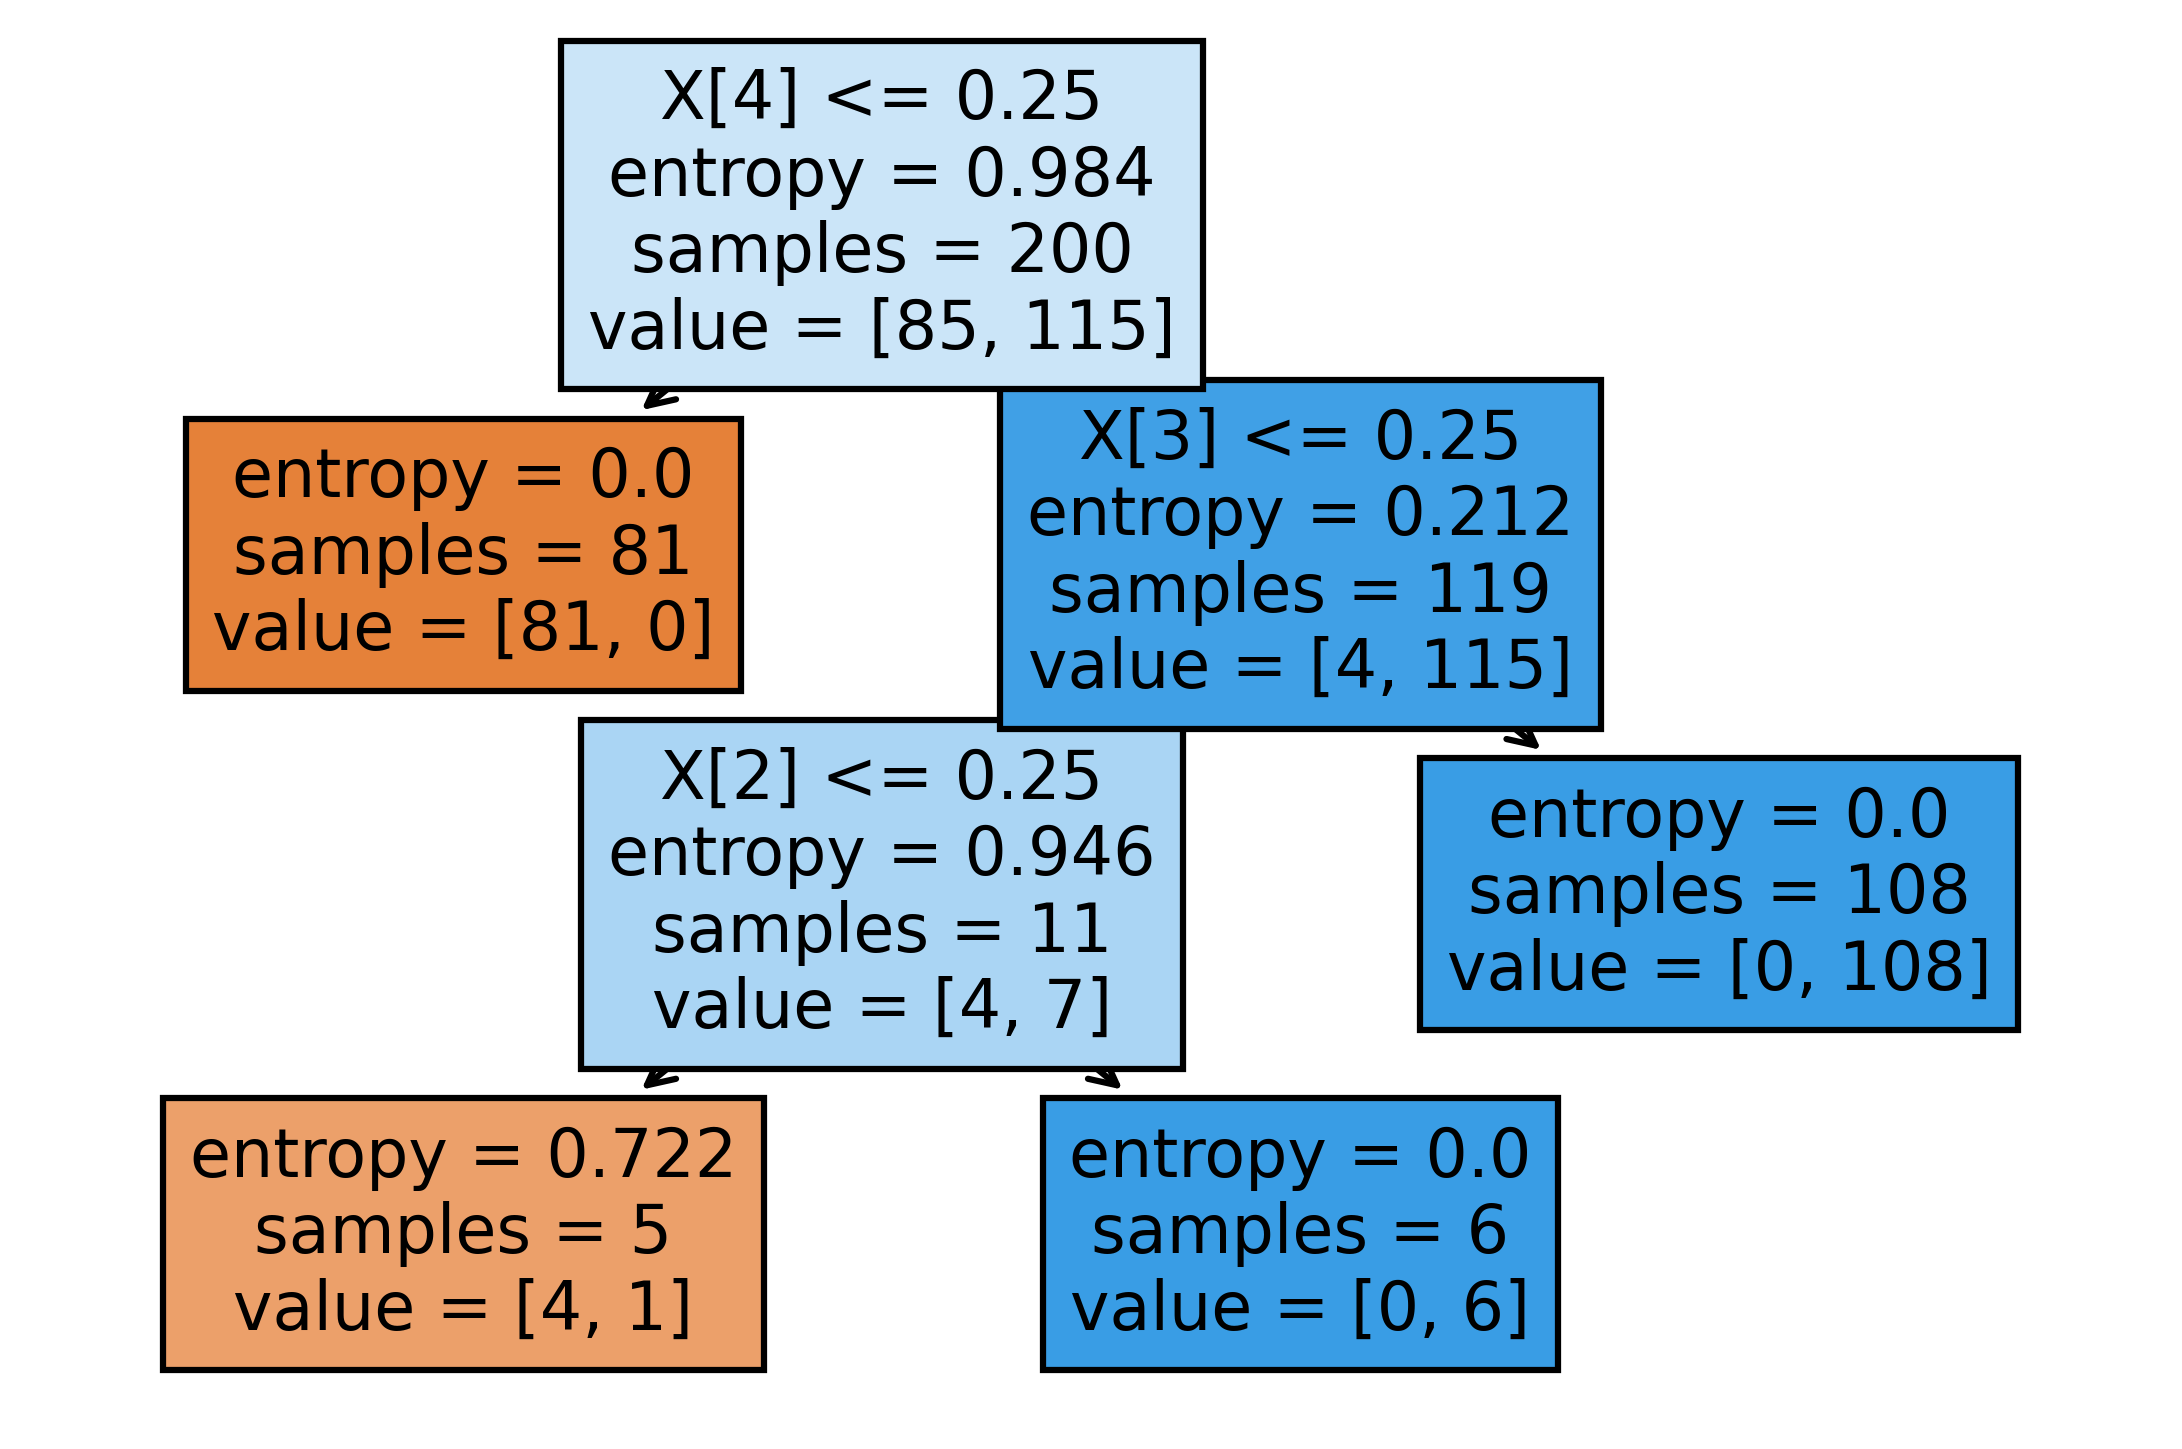

In [ ]:


#PLot the decision tree
plt.figure(dpi=450)
tree.plot_tree(Decision_model_new,filled=True);

In [ ]:

preds_decision = Decision_model_new.predict(x_test)
preds_decision

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1])



#### Accuracy, Precision, Recall and f1-score of best parameter Decision Tree model on test data

In [ ]:
hyper_decision_acc_score = accuracy_score(y_test,preds_decision)
hyper_decision_precision_score = precision_score(y_test,preds_decision)
hyper_decision_recall_score = recall_score(y_test,preds_decision)
hyper_decision_f1_score = f1_score(y_test,preds_decision)
print('accuracy_score',hyper_decision_acc_score)
print('precision_score',hyper_decision_precision_score)
print('recall_score',hyper_decision_recall_score)
print('f1_score',hyper_decision_f1_score)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0






#### Classification report of best parameter Decision Tree model on test data

In [ ]:
print(classification_report(y_test,preds_decision))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### AUC_ROC curve for Decision Tree

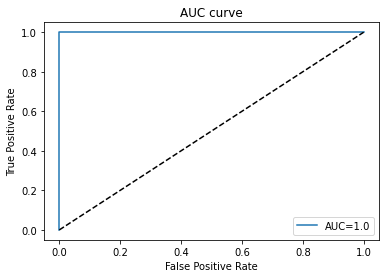

In [ ]:
roc_dec=Decision_model_new.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_dec)
auc = metrics.roc_auc_score(y_test, roc_dec)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('AUC curve')
plt.legend(loc=4)
plt.show()

#### AUC is 1 hence Decision tree model is good for prediction.

### Random Forest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_ran = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_features=3)
model_ran.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features=3, n_estimators=200)

In [ ]:
ran_pred_test = model_ran.predict(x_test)
ran_pred_test

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1])

In [ ]:
ran_pred_train = model_ran.predict(x_train)
ran_pred_train

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1])

#### Accuracy,Precision,Recall and f1-score of Random forest model on test data

In [ ]:
random_acc_test = accuracy_score(y_test,ran_pred_test)
random_precision_test = precision_score(y_test,ran_pred_test)
random_recall_test = recall_score(y_test,ran_pred_test)
random_f1_test = f1_score(y_test,ran_pred_test)
print('accuracy_score',random_acc_test)
print('precision_score',random_precision_test)
print('recall_score',random_recall_test)
print('f1_score',random_f1_test)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Accuracy, Precision, Recall and f1-score of Random forest model on train data

In [ ]:
random_acc_train = accuracy_score(y_train,ran_pred_train)
random_precision_train = precision_score(y_train,ran_pred_train)
random_recall_train = recall_score(y_train,ran_pred_train)
random_f1_train = f1_score(y_train,ran_pred_train)
print('accuracy_score',random_acc_train)
print('precision_score',random_precision_train)
print('recall_score',random_recall_train)
print('f1_score',random_f1_train)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Here performance metrics for train and test data are same. There is no overfitting model

#### Classification report of Random Forest on Test data

In [ ]:
print(classification_report(y_test,ran_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### Classification report of random forest on train data

In [ ]:
print(classification_report(y_train,ran_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00       115

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### Hyperparameter tunning for Random forest

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

#### After hyperparameter tuning best parameters for Random forest are:
#### {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
#### We'll fit best model with this parameters

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=4, criterion='gini')
rfc1

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=42)

In [ ]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=42)

In [ ]:
pred_rfc1=rfc1.predict(x_test)
pred_rfc1

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1])

#### Accuracy, Precision, Recall and f1-score of Best parameter for Random Forest

In [ ]:
hyper_random_acc = accuracy_score(y_test,pred_rfc1)
hyper_random_precision = precision_score(y_test,pred_rfc1)
hyper_random_recall = recall_score(y_test,pred_rfc1)
hyper_random_f1 = f1_score(y_test,pred_rfc1)
print('accuracy_score',hyper_random_acc)
print('precision_score',hyper_random_precision)
print('recall_score',hyper_random_recall)
print('f1_score',hyper_random_f1)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Classification report of best parameter for Random Forest

In [ ]:
print(classification_report(y_test,pred_rfc1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### AUC_ROC curve for random forest

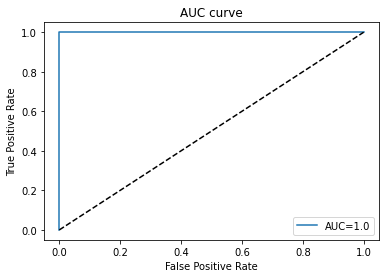

In [ ]:
roc_random=rfc1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_random)
auc = metrics.roc_auc_score(y_test, roc_random)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('AUC curve')
plt.legend(loc=4)
plt.show()

#### AUC is 1 hence Random forest model is good for prediction.

### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=SVC()
svm.fit(x_train,y_train)
## prediction on test data
pred_svm_test=svm.predict(x_test)
pred_svm_test

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1])

In [ ]:
## prediction on train data
pred_svm_train=svm.predict(x_train)
pred_svm_train

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1])

#### Accuracy, Precision, Recall and f1-score of SVM model on Test Data

In [ ]:
svm_acc_test = accuracy_score(y_test,pred_svm_test)
svm_precision_test = precision_score(y_test,pred_svm_test)
svm_recall_test = recall_score(y_test,pred_svm_test)
svm_f1_test = f1_score(y_test,pred_svm_test)
print('accuracy_score',svm_acc_test)
print('precision_score',svm_precision_test)
print('recall_score',svm_recall_test)
print('f1_score',svm_f1_test)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Accuracy, Precision, Recall and f1-score of SVM model on Train Data

In [ ]:
svm_acc_train = accuracy_score(y_train,pred_svm_train)
svm_precision_train = precision_score(y_train,pred_svm_train)
svm_recall_train = recall_score(y_train,pred_svm_train)
svm_f1_train = f1_score(y_train,pred_svm_train)
print('accuracy_score',svm_acc_train)
print('precision_score',svm_precision_train)
print('recall_score',svm_recall_train)
print('f1_score',svm_f1_train)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Here performance metrics for train and test data are almost same. There is no overfitting model

#### Classification Report of SVM model on test data

In [ ]:
print(classification_report(y_test,pred_svm_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### Classification Report of SVM model on train data

In [ ]:
print(classification_report(y_train,pred_svm_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00       115

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### Hyperparameter Tunning for SVM

In [ ]:
params={
    'C':[0.001,0.01,1,10],
    'kernel':['linear','poly','rbf'],
    'gamma':[0.001,0.01,1,10]
}

In [ ]:
grid_svm=GridSearchCV(SVC(),param_grid=params)

In [ ]:
grid_svm.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 10],
                         'gamma': [0.001, 0.01, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
grid_svm.best_estimator_

SVC(C=1, gamma=0.001, kernel='linear')

In [ ]:
grid_svm.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

#### After hyperparameter tuning best parameters for SVM are:
#### {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
#### We'll fit best model with this parameters

In [ ]:
grid_svm.best_score_

0.9949999999999999

In [ ]:
svm_hyper=SVC(C=1,gamma=0.001,kernel='linear',probability=True)
svm_hyper.fit(x_train,y_train)
pred_svm_hyper=svm_hyper.predict(x_test)

#### Accuracy,Precision,Recall and f1-score of best parameter SVM model

In [ ]:
hyper_svm_acc = accuracy_score(y_test,pred_svm_hyper)
hyper_svm_precision = precision_score(y_test,pred_svm_hyper)
hyper_svm_recall = recall_score(y_test,pred_svm_hyper)
hyper_svm_f1 = f1_score(y_test,pred_svm_hyper)
print('accuracy_score',hyper_svm_acc)
print('precision_score',hyper_svm_precision)
print('recall_score',hyper_svm_recall)
print('f1_score',hyper_svm_f1)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Classification Report of best parameter SVM model

In [ ]:
print(classification_report(y_test,pred_svm_hyper))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### AUC_Roc curve for SVM

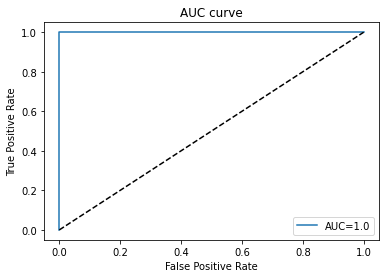

In [ ]:

roc_svm = svm_hyper.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_svm)
auc = metrics.roc_auc_score(y_test, roc_svm)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('AUC curve')
plt.legend(loc=4)
plt.show()

#### AUC is close to 1 hence SVM model is good for prediction.

### KNN

In [ ]:


from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)
pred_knn_test=knn.predict(x_test)
pred_knn_test

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1])

In [ ]:
pred_knn_train=knn.predict(x_train)
pred_knn_train

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1])

#### Accuracy, Precision, Recall and f1-score of Knn model on test data

In [ ]:
knn_acc_test = accuracy_score(y_test,pred_knn_test)
knn_precision_test = precision_score(y_test,pred_knn_test)
knn_recall_test = recall_score(y_test,pred_knn_test)
knn_f1_test = f1_score(y_test,pred_knn_test)
print('accuracy_score',knn_acc_test)
print('precision_score',knn_precision_test)
print('recall_score',knn_recall_test)
print('f1_score',knn_f1_test)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Accuracy, Precision, Recall and f1-score of Knn model on train data

In [ ]:
knn_acc_train = accuracy_score(y_train,pred_knn_train)
knn_precision_train = precision_score(y_train,pred_knn_train)
knn_recall_train = recall_score(y_train,pred_knn_train)
knn_f1_train = f1_score(y_train,pred_knn_train)
print('accuracy_score',knn_acc_train)
print('precision_score',knn_precision_train)
print('recall_score',knn_recall_train)
print('f1_score',knn_f1_train)

accuracy_score 0.995
precision_score 0.9913793103448276
recall_score 1.0
f1_score 0.9956709956709957


#### Here performance metrics for train and test data are almost same. There is no overfitting model

#### Classification Report of Knn model on test data

In [ ]:
print(classification_report(y_test,pred_knn_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### Classification Report of Knn model on train data

In [ ]:
print(classification_report(y_train,pred_knn_train))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        85
           1       0.99      1.00      1.00       115

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



### Hyperparameter tunning for knn

In [ ]:
trainac=[]
testac=[]

for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    trainac.append(knn.score(x_train,y_train))
    testac.append(knn.score(x_test,y_test))

In [ ]:
trainac

[1.0, 1.0, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995]

In [ ]:
testac

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#### After hyperparameter tuning best parameters for Knn are:
#### (n_neighbors=2)
#### We'll fit best model with this parameter

In [ ]:
best_knn= KNeighborsClassifier(n_neighbors=2)
best_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
best_pred_knn_test=best_knn.predict(x_test)
best_pred_knn_test

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1])

#### Accuracy, Precision, Recall and f1-score of best parameter knn model on test data

In [ ]:
hyper_knn_acc_test = accuracy_score(y_test,best_pred_knn_test)
hyper_knn_precision_test = precision_score(y_test,best_pred_knn_test)
hyper_knn_recall_test = recall_score(y_test,best_pred_knn_test)
hyper_knn_f1_test = f1_score(y_test,best_pred_knn_test)
print('accuracy_score',hyper_knn_acc_test)
print('precision_score',hyper_knn_precision_test)
print('recall_score',hyper_knn_recall_test)
print('f1_score',hyper_knn_f1_test)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Classification report of best parameter knn model on test data

In [ ]:
print(classification_report(y_test,best_pred_knn_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



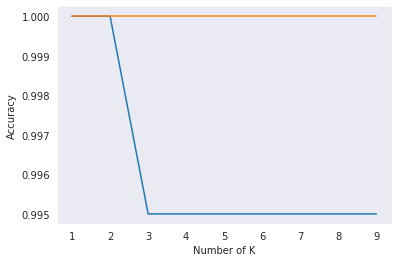

In [ ]:
sns.set_style('darkgrid')

plt.plot(range(1,10),trainac)
plt.plot(range(1,10),testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

#### AUC_ROC curve for knn

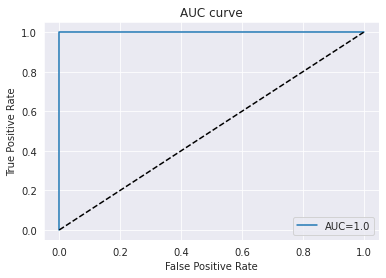

In [ ]:
roc_knn = best_knn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_knn)
auc = metrics.roc_auc_score(y_test, roc_knn)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('AUC curve')
plt.legend(loc=4)
plt.show()

#### AUC is close to 1 hence KNN model is good for prediction.

### Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bg=BaggingClassifier(LogisticRegression(),n_estimators=30)

In [ ]:
bg.fit(x_train,y_train)
pred_bagg_test=bg.predict(x_test)
pred_bagg_test

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1])

In [ ]:
pred_bagg_train=bg.predict(x_train)
pred_bagg_train

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1])

#### Accuracy, Precision, Recall and f1-score of bagging model on test data

In [ ]:
bagg_acc_test = accuracy_score(y_test,pred_bagg_test)
bagg_precision_test = precision_score(y_test,pred_bagg_test)
bagg_recall_test = recall_score(y_test,pred_bagg_test)
bagg_f1_test = f1_score(y_test,pred_bagg_test)
print('accuracy_score',bagg_acc_test)
print('precision_score',bagg_precision_test)
print('recall_score',bagg_recall_test)
print('f1_score',bagg_f1_test)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Accuracy,Precision,Recall of bagging model on train data

In [ ]:
bagg_acc_train = accuracy_score(y_train,pred_bagg_train)
bagg_precision_train = precision_score(y_train,pred_bagg_train)
bagg_recall_train = recall_score(y_train,pred_bagg_train)
bagg_f1_train = f1_score(y_train,pred_bagg_train)
print('accuracy_score',bagg_acc_train)
print('precision_score',bagg_precision_train)
print('recall_score',bagg_recall_train)
print('f1_score',bagg_f1_train)

accuracy_score 0.995
precision_score 0.9913793103448276
recall_score 1.0
f1_score 0.9956709956709957


#### Here performance metrics for train and test data are almost same. There is no overfitting model

#### Classification report of bagging model on test data

In [ ]:
print(classification_report(y_test,pred_bagg_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### Classification report of bagging model on train data

In [ ]:
print(classification_report(y_train,pred_bagg_train))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        85
           1       0.99      1.00      1.00       115

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



#### AUC curve for bagging model

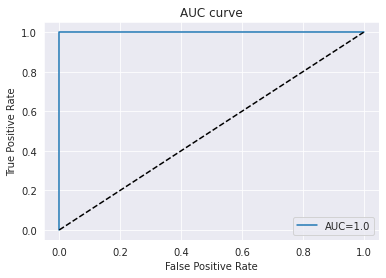

In [ ]:
roc_bagg = bg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_bagg)
auc = metrics.roc_auc_score(y_test, roc_bagg)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('AUC curve')
plt.legend(loc=4)
plt.show()

#### AUC is close to 1 hence Bagging model is good for prediction.

### Boosting Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ad=AdaBoostClassifier(LogisticRegression(),n_estimators=30)

In [ ]:
ad.fit(x_train,y_train)
pred_ada_test=ad.predict(x_test)
pred_ada_test

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1])

In [ ]:
pred_ada_train=ad.predict(x_train)
pred_ada_train

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1])

#### Accuracy, Precision, Recall and f1-score of boosting model on test data

In [ ]:
boos_acc_test = accuracy_score(y_test,pred_ada_test)
boos_precision_test = precision_score(y_test,pred_ada_test)
boos_recall_test = recall_score(y_test,pred_ada_test)
boos_f1_test = f1_score(y_test,pred_ada_test)
print('accuracy_score',boos_acc_test)
print('precision_score',boos_precision_test)
print('recall_score',boos_recall_test)
print('f1_score',boos_f1_test)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Accuracy,Precision,recall of boosting model on train data

In [ ]:
boos_acc_train = accuracy_score(y_train,pred_ada_train)
boos_precision_train = precision_score(y_train,pred_ada_train)
boos_recall_train = recall_score(y_train,pred_ada_train)
boos_f1_train = f1_score(y_train,pred_ada_train)
print('accuracy_score',boos_acc_train)
print('precision_score',boos_precision_train)
print('recall_score',boos_recall_train)
print('f1_score',boos_recall_train)

accuracy_score 0.995
precision_score 0.9913793103448276
recall_score 1.0
f1_score 1.0


#### Here performance metrics for train and test data are almost same. There is no overfitting model

#### Classification report of boosting model on test data

In [ ]:
print(classification_report(y_test,pred_ada_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### Classification report of boosting model on train data

In [ ]:
print(classification_report(y_train,pred_ada_train))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        85
           1       0.99      1.00      1.00       115

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



#### AUC_ROC curve for boosting model

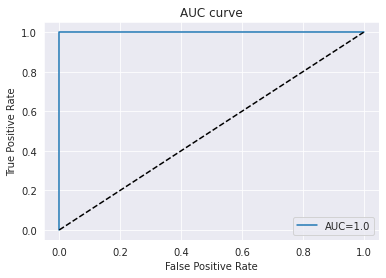

In [ ]:
roc_ada = ad.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_ada)
auc = metrics.roc_auc_score(y_test, roc_ada)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('AUC curve')
plt.legend(loc=4)
plt.show()

#### AUC is 1 hence boosting model is good for prediction.

### Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
base_learners = [
                 ('rf_1', RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=4, criterion='gini')),
                 ('rf_2', KNeighborsClassifier(n_neighbors=2))             
                ]

In [ ]:
st=StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(C=10,penalty='l2',solver='newton-cg'))

In [ ]:
st.fit(x_train,y_train)

StackingClassifier(estimators=[('rf_1',
                                RandomForestClassifier(max_depth=4,
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('rf_2', KNeighborsClassifier(n_neighbors=2))],
                   final_estimator=LogisticRegression(C=10, solver='newton-cg'))

In [ ]:
pred_stac_test=st.predict(x_test)
pred_stac_test

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1])

In [ ]:
pred_stac_train=st.predict(x_train)
pred_stac_train

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1])

#### Accuracy, Precision, Recall and f1-score of stacking model on test data

In [ ]:
stac_acc_test = accuracy_score(y_test,pred_stac_test)
stac_precision_test = precision_score(y_test,pred_stac_test)
stac_recall_test = recall_score(y_test,pred_stac_test)
stac_f1_test = f1_score(y_test,pred_stac_test)
print('accuracy_score',stac_acc_test)
print('precision_score',stac_precision_test)
print('recall_score',stac_recall_test)
print('f1_score',stac_f1_test)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Accuracy, Precision, recall and f1-score of stacking model on train data

In [ ]:
stac_acc_train = accuracy_score(y_train,pred_stac_train)
stac_precision_train = precision_score(y_train,pred_stac_train)
stac_recall_train = recall_score(y_train,pred_stac_train)
stac_f1_train = f1_score(y_train,pred_stac_train)
print('accuracy_score',stac_acc_train)
print('precision_score',stac_precision_train)
print('recall_score',stac_recall_train)
print('f1_score',stac_f1_train)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Here performance metrics for train and test data are almost same. There is no overfitting model

#### Classification report of stacking model on test data

In [ ]:
print(classification_report(y_test,pred_stac_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### Classification report of stacking model on train data

In [ ]:
print(classification_report(y_train,pred_stac_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00       115

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



#### AUC_ROC curve for stacking model

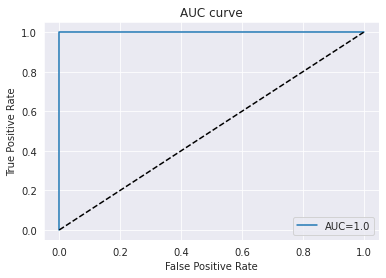

In [ ]:
stac_ada = st.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  stac_ada)
auc = metrics.roc_auc_score(y_test, stac_ada)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('AUC curve')
plt.legend(loc=4)
plt.show()

#### AUC is close to 1 hence stacking model is good for prediction.

### XGBOOST classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier(max_depth=9)

In [ ]:
xgb.fit(x_train,y_train)

XGBClassifier(max_depth=9)

In [ ]:
pred_xgb_test=xgb.predict(x_test)
pred_xgb_test

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1])

In [ ]:
pred_xgb_train=xgb.predict(x_train)
pred_xgb_train

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1])

#### Accuracy, Precision, recall and f1-score of XGBoost model on Test data

In [ ]:
xgb_acc_test = accuracy_score(y_test,pred_xgb_test)
xgb_precision_test = precision_score(y_test,pred_xgb_test)
xgb_recall_test = recall_score(y_test,pred_xgb_test)
xgb_f1_test = f1_score(y_test,pred_xgb_test)
print('accuracy_score',xgb_acc_test)
print('precision_score',xgb_precision_test)
print('recall_score',xgb_recall_test)
print('f1_score',xgb_f1_test)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Accuracy, Precision, recall and f1-score of XGBoost model on Train data

In [ ]:
xgb_acc_train = accuracy_score(y_train,pred_xgb_train)
xgb_precision_train = precision_score(y_train,pred_xgb_train)
xgb_recall_train = recall_score(y_train,pred_xgb_train)
xgb_f1_train = f1_score(y_train,pred_xgb_train)
print('accuracy_score',xgb_acc_train)
print('precision_score',xgb_precision_train)
print('recall_score',xgb_recall_train)
print('f1_score',xgb_f1_train)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Classification Report of XGBoost on test data

In [ ]:
print(classification_report(y_test,pred_xgb_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### Classification Report of XGBoost on train data

In [ ]:
print(classification_report(y_train,pred_xgb_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00       115

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



#### AUC_ROC curve for XGBoost

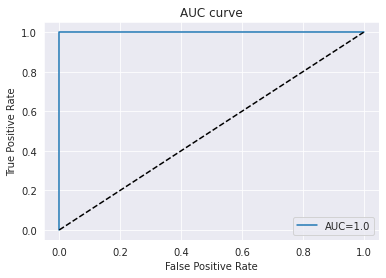

In [ ]:
roc_xgb = xgb.predict_proba(x_test)[::,1]
auc = metrics.roc_auc_score(y_test, roc_xgb)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('AUC curve')
plt.legend(loc=4)
plt.show()

#### AUC is  1 hence XGBoost model is good for prediction.

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive= GaussianNB()
naive.fit(x_train, y_train)

GaussianNB()

In [ ]:
naive_pred_test  =  naive.predict(x_test)
naive_pred_test

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1])

In [ ]:
naive_pred_train  =  naive.predict(x_train)
naive_pred_train

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1])

#### Accuracy, Precision, recall and f1-score of Naive Bayes model on Test data

In [ ]:
naive_acc_test = accuracy_score(y_test,naive_pred_test)
naive_precision_test = precision_score(y_test,naive_pred_test)
naive_recall_test = recall_score(y_test,naive_pred_test)
naive_f1_test = f1_score(y_test,naive_pred_test)
print('accuracy_score',naive_acc_test)
print('precision_score',naive_precision_test)
print('recall_score',naive_recall_test)
print('f1_score',naive_f1_test)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Accuracy, Precision, recall and f1-score of Naive Bayes model on train data

In [ ]:
naive_acc_train = accuracy_score(y_train,naive_pred_train)
naive_precision_train = precision_score(y_train,naive_pred_train)
naive_recall_train = recall_score(y_train,naive_pred_train)
naive_f1_train = f1_score(y_train,naive_pred_train)
print('accuracy_score',naive_acc_train)
print('precision_score',naive_precision_train)
print('recall_score',naive_recall_train)
print('f1_score',naive_f1_train)

accuracy_score 0.975
precision_score 0.9583333333333334
recall_score 1.0
f1_score 0.9787234042553191


#### Classification Report of Naive bayes on test data

In [ ]:
print(classification_report(y_test,naive_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### Classification Report of Naive Bayes on train data

In [ ]:
print(classification_report(y_train,naive_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        85
           1       0.96      1.00      0.98       115

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



#### AUC_ROC Curve for naive bayes

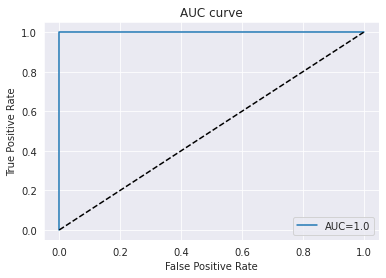

In [ ]:
roc_naive = naive.predict_proba(x_test)[::,1]
auc = metrics.roc_auc_score(y_test, roc_naive)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('AUC curve')
plt.legend(loc=4)
plt.show()

#### AUC is close to 1 hence Naive Bayes model is good for prediction.

### Neural Network

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
ann=Sequential()
ann.add(Dense(units=30,activation='relu'))
ann.add(Dense(units=20,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))

#make connection
ann.compile(optimizer='adam',loss='binary_crossentropy')
ann.fit(x_train,y_train,epochs=250)

In [ ]:
loss=pd.DataFrame(ann.history.history)
loss

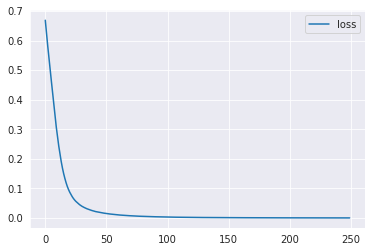

In [ ]:
loss.plot()

In [ ]:
ann=Sequential()
ann.add(Dense(units=30,activation='relu'))
ann.add(Dense(units=20,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))

#make connection
ann.compile(optimizer='adam',loss='binary_crossentropy')
ann.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=250)

In [ ]:

loss1=pd.DataFrame(ann.history.history)
loss1

,loss,val_loss
0,0.647040,0.610694
1,0.612019,0.575270
2,0.576420,0.536884
3,0.538606,0.495201
4,0.495799,0.447368
...,...,...
245,0.000419,0.000184
246,0.000415,0.000182
247,0.000410,0.000180
248,0.000406,0.000178


Text(0, 0.5, 'Error')

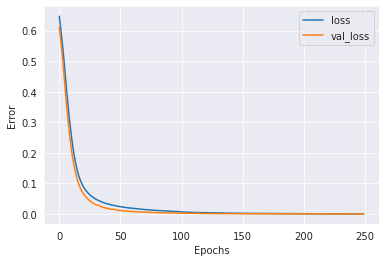

In [ ]:
loss1.plot()
plt.xlabel('Epochs')
plt.ylabel('Error')

In [ ]:
preds_ann_test = ann.predict(x_test)
preds_ann_test

In [ ]:
preds_ann_test1 = preds_ann_test.tolist()

In [ ]:
pred_ann_y = [item for sublist in preds_ann_test1 for item in sublist]
pred_ann_y

In [ ]:
ann_lst_test = []
for element in pred_ann_y:
  if element < 0.5:
    ann_lst_test.append(0)
  else:
    ann_lst_test.append(1)

In [ ]:

ann_lst_test

In [ ]:
preds_ann_train = ann.predict(x_train)
preds_ann_train

In [ ]:
preds_ann_train1 = preds_ann_train.tolist()

In [ ]:
pred_ann_y_train = [item for sublist in preds_ann_train1 for item in sublist]
pred_ann_y_train

In [ ]:
ann_lst_train = []
for element in pred_ann_y_train:
  if element < 0.5:
    ann_lst_train.append(0)
  else:
    ann_lst_train.append(1)

In [ ]:

ann_lst_train

### Accuracy, Precision, Recall and F1-score of ANN model on test data

In [ ]:
ann_acc_test = accuracy_score(y_test,ann_lst_test)
ann_precision_test = precision_score(y_test,ann_lst_test)
ann_recall_test = recall_score(y_test,ann_lst_test)
ann_f1_test = f1_score(y_test,ann_lst_test)
print('accuracy_score',ann_acc_test)
print('precision_score',ann_precision_test)
print('recall_score',ann_recall_test)
print('f1_score',ann_f1_test)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


### Accuracy, Precision, Recall and F1-score of ANN model on train data


In [ ]:
ann_acc_train = accuracy_score(y_train,ann_lst_train)
ann_precision_train = precision_score(y_train,ann_lst_train)
ann_recall_train = recall_score(y_train,ann_lst_train)
ann_f1_train = f1_score(y_train,ann_lst_train)
print('accuracy_score',ann_acc_train)
print('precision_score',ann_precision_train)
print('recall_score',ann_recall_train)
print('f1_score',ann_f1_train)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


#### Model comparison

In [ ]:
model_comp_df = pd.DataFrame()
model_comp_df['Model_name'] = ['Logistic_regression','Decision_tree','Random_Forest','SVM','KNN','Bagging_classifier','ADABoot_Classifire','Stacking_Classifier','XGBoost_Classifier','NaiveBayes','ANN']
model_comp_df['Accuracy'] = [1,0.98,1,1,1,1,1,1,1,1,1]
model_comp_df['Precision'] = [1,0.97,1,1,1,1,1,1,1,1,1]
model_comp_df['Recall'] = [1,0.98,1,1,1,1,1,1,1,1,1]
model_comp_df['F1_Score'] = [1,0.97,1,1,1,1,1,1,1,1,1]
model_comp_df

,Model_name,Accuracy,Precision,Recall,F1_Score
0,Logistic_regression,1.00,1.00,1.00,1.00
1,Decision_tree,0.98,0.97,0.98,0.97
2,Random_Forest,1.00,1.00,1.00,1.00
3,SVM,1.00,1.00,1.00,1.00
4,KNN,1.00,1.00,1.00,1.00
5,Bagging_classifier,1.00,1.00,1.00,1.00
6,ADABoot_Classifire,1.00,1.00,1.00,1.00
7,Stacking_Classifier,1.00,1.00,1.00,1.00
8,XGBoost_Classifier,1.00,1.00,1.00,1.00
9,NaiveBayes,1.00,1.00,1.00,1.00


### All models have performance metrics near to 1, we can use any one model for deployment

### Save Model

### Saving Logistic regression model as pickle file for deployment and future prediction

In [ ]:
import pickle

In [ ]:
pkl_file = "Logistic_regression.pkl"
with open(pkl_file,'wb')as file:
  pickle.dump(best_logistic,file)